# Approximating Year 1's reward Ditribution using Bayesian Optimization

In this notebook we demonstrate the efficiency of Bayesian Optimization in approximating year 1's reward distribution. 

In [2]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import UtilityFunction
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import mlab
from matplotlib import gridspec
%matplotlib inline

In [8]:
## challenge import
from netsapi.challenge import *
 
from sys import exit, exc_info, argv
from multiprocessing import Pool, current_process
import random as rand
import json
import requests
import numpy as np
import pandas as pd


import statistics
from IPython.display import clear_output

from contextlib import contextmanager
import sys, os
@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print("done")

done


In [4]:
envSeqDec = ChallengeSeqDecEnvironment()  # here you can change the environment (environment 1 or 2 )
x_start = 0.0
x_end = 1.0

VAL_Max = 1.2 # fel heat map

def target1(x, y):
    x = np.asscalar(x)
    y = np.asscalar(y)
    envSeqDec.reset()
    action = [x , y]
    print("action",action)
    s,r,d,_ = envSeqDec.evaluateAction(action)
    return r/90.0    

def target(x,y):
    if type(x) is np.ndarray:
        result = []
        for a,b in zip(x,y):
            reward = target1(a,b)
            result.append( reward )
            print((len(result) % 30 ) )
            if ((len(result) % 30 ) > 25) : 
                global envSeqDec
                envSeqDec = ChallengeSeqDecEnvironment()
        return result
    else:
        return target1(x,y)


In [5]:
# let's get an idea about the target  function

x = y = np.linspace(x_start, x_end, 40)# was 300
X, Y = np.meshgrid(x, y)
x = X.ravel()
y = Y.ravel()
X = np.vstack([x, y]).T[:, [1, 0]]
z = target(x, y)


action [0.0, 0.0]
105  Evaluations Remaining
1
action [0.02564102564102564, 0.0]
104  Evaluations Remaining
2
action [0.05128205128205128, 0.0]
103  Evaluations Remaining
3
action [0.07692307692307693, 0.0]
102  Evaluations Remaining
4
action [0.10256410256410256, 0.0]
101  Evaluations Remaining
5
action [0.1282051282051282, 0.0]
100  Evaluations Remaining
6
action [0.15384615384615385, 0.0]
99  Evaluations Remaining
7
action [0.1794871794871795, 0.0]
98  Evaluations Remaining
8
action [0.20512820512820512, 0.0]
97  Evaluations Remaining
9
action [0.23076923076923075, 0.0]
96  Evaluations Remaining
10
action [0.2564102564102564, 0.0]
95  Evaluations Remaining
11
action [0.28205128205128205, 0.0]
94  Evaluations Remaining
12
action [0.3076923076923077, 0.0]
93  Evaluations Remaining
13
action [0.3333333333333333, 0.0]
92  Evaluations Remaining
14
action [0.358974358974359, 0.0]
91  Evaluations Remaining
15
action [0.3846153846153846, 0.0]
90  Evaluations Remaining
16
action [0.410256410

25
action [0.8974358974358974, 0.05128205128205128]
79  Evaluations Remaining
26
action [0.923076923076923, 0.05128205128205128]
105  Evaluations Remaining
27
action [0.9487179487179487, 0.05128205128205128]
105  Evaluations Remaining
28
action [0.9743589743589743, 0.05128205128205128]
105  Evaluations Remaining
29
action [1.0, 0.05128205128205128]
105  Evaluations Remaining
0
action [0.0, 0.07692307692307693]
104  Evaluations Remaining
1
action [0.02564102564102564, 0.07692307692307693]
103  Evaluations Remaining
2
action [0.05128205128205128, 0.07692307692307693]
102  Evaluations Remaining
3
action [0.07692307692307693, 0.07692307692307693]
101  Evaluations Remaining
4
action [0.10256410256410256, 0.07692307692307693]
100  Evaluations Remaining
5
action [0.1282051282051282, 0.07692307692307693]
99  Evaluations Remaining
6
action [0.15384615384615385, 0.07692307692307693]
98  Evaluations Remaining
7
action [0.1794871794871795, 0.07692307692307693]
97  Evaluations Remaining
8
action [0

12
action [0.5641025641025641, 0.1282051282051282]
92  Evaluations Remaining
13
action [0.5897435897435898, 0.1282051282051282]
91  Evaluations Remaining
14
action [0.6153846153846154, 0.1282051282051282]
90  Evaluations Remaining
15
action [0.641025641025641, 0.1282051282051282]
89  Evaluations Remaining
16
action [0.6666666666666666, 0.1282051282051282]
88  Evaluations Remaining
17
action [0.6923076923076923, 0.1282051282051282]
87  Evaluations Remaining
18
action [0.717948717948718, 0.1282051282051282]
86  Evaluations Remaining
19
action [0.7435897435897436, 0.1282051282051282]
85  Evaluations Remaining
20
action [0.7692307692307692, 0.1282051282051282]
84  Evaluations Remaining
21
action [0.7948717948717948, 0.1282051282051282]
83  Evaluations Remaining
22
action [0.8205128205128205, 0.1282051282051282]
82  Evaluations Remaining
23
action [0.8461538461538461, 0.1282051282051282]
81  Evaluations Remaining
24
action [0.8717948717948718, 0.1282051282051282]
80  Evaluations Remaining
2

0
action [0.2564102564102564, 0.20512820512820512]
104  Evaluations Remaining
1
action [0.28205128205128205, 0.20512820512820512]
103  Evaluations Remaining
2
action [0.3076923076923077, 0.20512820512820512]
102  Evaluations Remaining
3
action [0.3333333333333333, 0.20512820512820512]
101  Evaluations Remaining
4
action [0.358974358974359, 0.20512820512820512]
100  Evaluations Remaining
5
action [0.3846153846153846, 0.20512820512820512]
99  Evaluations Remaining
6
action [0.41025641025641024, 0.20512820512820512]
98  Evaluations Remaining
7
action [0.4358974358974359, 0.20512820512820512]
97  Evaluations Remaining
8
action [0.4615384615384615, 0.20512820512820512]
96  Evaluations Remaining
9
action [0.48717948717948717, 0.20512820512820512]
95  Evaluations Remaining
10
action [0.5128205128205128, 0.20512820512820512]
94  Evaluations Remaining
11
action [0.5384615384615384, 0.20512820512820512]
93  Evaluations Remaining
12
action [0.5641025641025641, 0.20512820512820512]
92  Evaluations

18
action [0.9743589743589743, 0.2564102564102564]
86  Evaluations Remaining
19
action [1.0, 0.2564102564102564]
85  Evaluations Remaining
20
action [0.0, 0.28205128205128205]
84  Evaluations Remaining
21
action [0.02564102564102564, 0.28205128205128205]
83  Evaluations Remaining
22
action [0.05128205128205128, 0.28205128205128205]
82  Evaluations Remaining
23
action [0.07692307692307693, 0.28205128205128205]
81  Evaluations Remaining
24
action [0.10256410256410256, 0.28205128205128205]
80  Evaluations Remaining
25
action [0.1282051282051282, 0.28205128205128205]
79  Evaluations Remaining
26
action [0.15384615384615385, 0.28205128205128205]
105  Evaluations Remaining
27
action [0.1794871794871795, 0.28205128205128205]
105  Evaluations Remaining
28
action [0.20512820512820512, 0.28205128205128205]
105  Evaluations Remaining
29
action [0.23076923076923075, 0.28205128205128205]
105  Evaluations Remaining
0
action [0.2564102564102564, 0.28205128205128205]
104  Evaluations Remaining
1
actio

6
action [0.6666666666666666, 0.3333333333333333]
98  Evaluations Remaining
7
action [0.6923076923076923, 0.3333333333333333]
97  Evaluations Remaining
8
action [0.717948717948718, 0.3333333333333333]
96  Evaluations Remaining
9
action [0.7435897435897436, 0.3333333333333333]
95  Evaluations Remaining
10
action [0.7692307692307692, 0.3333333333333333]
94  Evaluations Remaining
11
action [0.7948717948717948, 0.3333333333333333]
93  Evaluations Remaining
12
action [0.8205128205128205, 0.3333333333333333]
92  Evaluations Remaining
13
action [0.8461538461538461, 0.3333333333333333]
91  Evaluations Remaining
14
action [0.8717948717948718, 0.3333333333333333]
90  Evaluations Remaining
15
action [0.8974358974358974, 0.3333333333333333]
89  Evaluations Remaining
16
action [0.923076923076923, 0.3333333333333333]
88  Evaluations Remaining
17
action [0.9487179487179487, 0.3333333333333333]
87  Evaluations Remaining
18
action [0.9743589743589743, 0.3333333333333333]
86  Evaluations Remaining
19
ac

24
action [0.358974358974359, 0.41025641025641024]
80  Evaluations Remaining
25
action [0.3846153846153846, 0.41025641025641024]
79  Evaluations Remaining
26
action [0.41025641025641024, 0.41025641025641024]
105  Evaluations Remaining
27
action [0.4358974358974359, 0.41025641025641024]
105  Evaluations Remaining
28
action [0.4615384615384615, 0.41025641025641024]
105  Evaluations Remaining
29
action [0.48717948717948717, 0.41025641025641024]
105  Evaluations Remaining
0
action [0.5128205128205128, 0.41025641025641024]
104  Evaluations Remaining
1
action [0.5384615384615384, 0.41025641025641024]
103  Evaluations Remaining
2
action [0.5641025641025641, 0.41025641025641024]
102  Evaluations Remaining
3
action [0.5897435897435898, 0.41025641025641024]
101  Evaluations Remaining
4
action [0.6153846153846154, 0.41025641025641024]
100  Evaluations Remaining
5
action [0.641025641025641, 0.41025641025641024]
99  Evaluations Remaining
6
action [0.6666666666666666, 0.41025641025641024]
98  Evalua

12
action [0.05128205128205128, 0.48717948717948717]
92  Evaluations Remaining
13
action [0.07692307692307693, 0.48717948717948717]
91  Evaluations Remaining
14
action [0.10256410256410256, 0.48717948717948717]
90  Evaluations Remaining
15
action [0.1282051282051282, 0.48717948717948717]
89  Evaluations Remaining
16
action [0.15384615384615385, 0.48717948717948717]
88  Evaluations Remaining
17
action [0.1794871794871795, 0.48717948717948717]
87  Evaluations Remaining
18
action [0.20512820512820512, 0.48717948717948717]
86  Evaluations Remaining
19
action [0.23076923076923075, 0.48717948717948717]
85  Evaluations Remaining
20
action [0.2564102564102564, 0.48717948717948717]
84  Evaluations Remaining
21
action [0.28205128205128205, 0.48717948717948717]
83  Evaluations Remaining
22
action [0.3076923076923077, 0.48717948717948717]
82  Evaluations Remaining
23
action [0.3333333333333333, 0.48717948717948717]
81  Evaluations Remaining
24
action [0.358974358974359, 0.48717948717948717]
80  Ev

0
action [0.7692307692307692, 0.5384615384615384]
104  Evaluations Remaining
1
action [0.7948717948717948, 0.5384615384615384]
103  Evaluations Remaining
2
action [0.8205128205128205, 0.5384615384615384]
102  Evaluations Remaining
3
action [0.8461538461538461, 0.5384615384615384]
101  Evaluations Remaining
4
action [0.8717948717948718, 0.5384615384615384]
100  Evaluations Remaining
5
action [0.8974358974358974, 0.5384615384615384]
99  Evaluations Remaining
6
action [0.923076923076923, 0.5384615384615384]
98  Evaluations Remaining
7
action [0.9487179487179487, 0.5384615384615384]
97  Evaluations Remaining
8
action [0.9743589743589743, 0.5384615384615384]
96  Evaluations Remaining
9
action [1.0, 0.5384615384615384]
95  Evaluations Remaining
10
action [0.0, 0.5641025641025641]
94  Evaluations Remaining
11
action [0.02564102564102564, 0.5641025641025641]
93  Evaluations Remaining
12
action [0.05128205128205128, 0.5641025641025641]
92  Evaluations Remaining
13
action [0.07692307692307693, 0

19
action [0.48717948717948717, 0.6153846153846154]
85  Evaluations Remaining
20
action [0.5128205128205128, 0.6153846153846154]
84  Evaluations Remaining
21
action [0.5384615384615384, 0.6153846153846154]
83  Evaluations Remaining
22
action [0.5641025641025641, 0.6153846153846154]
82  Evaluations Remaining
23
action [0.5897435897435898, 0.6153846153846154]
81  Evaluations Remaining
24
action [0.6153846153846154, 0.6153846153846154]
80  Evaluations Remaining
25
action [0.641025641025641, 0.6153846153846154]
79  Evaluations Remaining
26
action [0.6666666666666666, 0.6153846153846154]
105  Evaluations Remaining
27
action [0.6923076923076923, 0.6153846153846154]
105  Evaluations Remaining
28
action [0.717948717948718, 0.6153846153846154]
105  Evaluations Remaining
29
action [0.7435897435897436, 0.6153846153846154]
105  Evaluations Remaining
0
action [0.7692307692307692, 0.6153846153846154]
104  Evaluations Remaining
1
action [0.7948717948717948, 0.6153846153846154]
103  Evaluations Remain

7
action [0.1794871794871795, 0.6923076923076923]
97  Evaluations Remaining
8
action [0.20512820512820512, 0.6923076923076923]
96  Evaluations Remaining
9
action [0.23076923076923075, 0.6923076923076923]
95  Evaluations Remaining
10
action [0.2564102564102564, 0.6923076923076923]
94  Evaluations Remaining
11
action [0.28205128205128205, 0.6923076923076923]
93  Evaluations Remaining
12
action [0.3076923076923077, 0.6923076923076923]
92  Evaluations Remaining
13
action [0.3333333333333333, 0.6923076923076923]
91  Evaluations Remaining
14
action [0.358974358974359, 0.6923076923076923]
90  Evaluations Remaining
15
action [0.3846153846153846, 0.6923076923076923]
89  Evaluations Remaining
16
action [0.41025641025641024, 0.6923076923076923]
88  Evaluations Remaining
17
action [0.4358974358974359, 0.6923076923076923]
87  Evaluations Remaining
18
action [0.4615384615384615, 0.6923076923076923]
86  Evaluations Remaining
19
action [0.48717948717948717, 0.6923076923076923]
85  Evaluations Remainin

26
action [0.923076923076923, 0.7435897435897436]
105  Evaluations Remaining
27
action [0.9487179487179487, 0.7435897435897436]
105  Evaluations Remaining
28
action [0.9743589743589743, 0.7435897435897436]
105  Evaluations Remaining
29
action [1.0, 0.7435897435897436]
105  Evaluations Remaining
0
action [0.0, 0.7692307692307692]
104  Evaluations Remaining
1
action [0.02564102564102564, 0.7692307692307692]
103  Evaluations Remaining
2
action [0.05128205128205128, 0.7692307692307692]
102  Evaluations Remaining
3
action [0.07692307692307693, 0.7692307692307692]
101  Evaluations Remaining
4
action [0.10256410256410256, 0.7692307692307692]
100  Evaluations Remaining
5
action [0.1282051282051282, 0.7692307692307692]
99  Evaluations Remaining
6
action [0.15384615384615385, 0.7692307692307692]
98  Evaluations Remaining
7
action [0.1794871794871795, 0.7692307692307692]
97  Evaluations Remaining
8
action [0.20512820512820512, 0.7692307692307692]
96  Evaluations Remaining
9
action [0.230769230769

14
action [0.6153846153846154, 0.8205128205128205]
90  Evaluations Remaining
15
action [0.641025641025641, 0.8205128205128205]
89  Evaluations Remaining
16
action [0.6666666666666666, 0.8205128205128205]
88  Evaluations Remaining
17
action [0.6923076923076923, 0.8205128205128205]
87  Evaluations Remaining
18
action [0.717948717948718, 0.8205128205128205]
86  Evaluations Remaining
19
action [0.7435897435897436, 0.8205128205128205]
85  Evaluations Remaining
20
action [0.7692307692307692, 0.8205128205128205]
84  Evaluations Remaining
21
action [0.7948717948717948, 0.8205128205128205]
83  Evaluations Remaining
22
action [0.8205128205128205, 0.8205128205128205]
82  Evaluations Remaining
23
action [0.8461538461538461, 0.8205128205128205]
81  Evaluations Remaining
24
action [0.8717948717948718, 0.8205128205128205]
80  Evaluations Remaining
25
action [0.8974358974358974, 0.8205128205128205]
79  Evaluations Remaining
26
action [0.923076923076923, 0.8205128205128205]
105  Evaluations Remaining
2

2
action [0.3076923076923077, 0.8974358974358974]
102  Evaluations Remaining
3
action [0.3333333333333333, 0.8974358974358974]
101  Evaluations Remaining
4
action [0.358974358974359, 0.8974358974358974]
100  Evaluations Remaining
5
action [0.3846153846153846, 0.8974358974358974]
99  Evaluations Remaining
6
action [0.41025641025641024, 0.8974358974358974]
98  Evaluations Remaining
7
action [0.4358974358974359, 0.8974358974358974]
97  Evaluations Remaining
8
action [0.4615384615384615, 0.8974358974358974]
96  Evaluations Remaining
9
action [0.48717948717948717, 0.8974358974358974]
95  Evaluations Remaining
10
action [0.5128205128205128, 0.8974358974358974]
94  Evaluations Remaining
11
action [0.5384615384615384, 0.8974358974358974]
93  Evaluations Remaining
12
action [0.5641025641025641, 0.8974358974358974]
92  Evaluations Remaining
13
action [0.5897435897435898, 0.8974358974358974]
91  Evaluations Remaining
14
action [0.6153846153846154, 0.8974358974358974]
90  Evaluations Remaining
15


21
action [0.02564102564102564, 0.9743589743589743]
83  Evaluations Remaining
22
action [0.05128205128205128, 0.9743589743589743]
82  Evaluations Remaining
23
action [0.07692307692307693, 0.9743589743589743]
81  Evaluations Remaining
24
action [0.10256410256410256, 0.9743589743589743]
80  Evaluations Remaining
25
action [0.1282051282051282, 0.9743589743589743]
79  Evaluations Remaining
26
action [0.15384615384615385, 0.9743589743589743]
105  Evaluations Remaining
27
action [0.1794871794871795, 0.9743589743589743]
105  Evaluations Remaining
28
action [0.20512820512820512, 0.9743589743589743]
105  Evaluations Remaining
29
action [0.23076923076923075, 0.9743589743589743]
105  Evaluations Remaining
0
action [0.2564102564102564, 0.9743589743589743]
104  Evaluations Remaining
1
action [0.28205128205128205, 0.9743589743589743]
103  Evaluations Remaining
2
action [0.3076923076923077, 0.9743589743589743]
102  Evaluations Remaining
3
action [0.3333333333333333, 0.9743589743589743]
101  Evaluatio

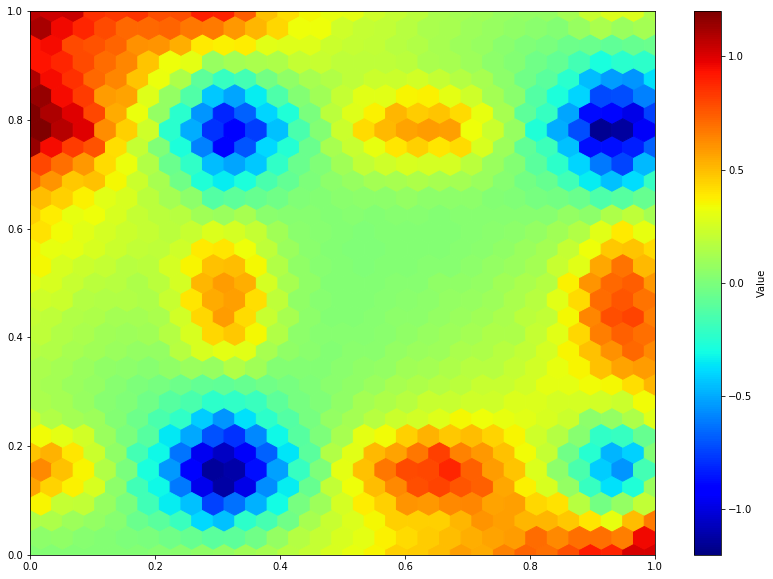

In [6]:

fig, axis = plt.subplots(1, 1, figsize=(14, 10))
gridsize=29

im = axis.hexbin(x, y, C=z, gridsize=gridsize, cmap=cm.jet, bins=None, vmin=-VAL_Max, vmax=VAL_Max)
axis.axis([x.min(), x.max(), y.min(), y.max()])

cb = fig.colorbar(im, )
cb.set_label('Value')


y1   min=-1.21 max=1.25 40by40.out
[[2.75671645e-02 2.83477984e-02 2.65722459e-02 ... 1.05763021e+00
  9.75040382e-01 1.01270948e+00]
 [5.47577064e-02 4.92837952e-02 4.63862897e-02 ... 7.76182199e-01
  8.94415416e-01 1.01907086e+00]
 [1.04018183e-01 9.63074168e-02 8.23448295e-02 ... 5.43901368e-01
  6.11510700e-01 8.03641191e-01]
 ...
 [9.35459110e-01 1.05445769e+00 9.25383607e-01 ... 9.86251934e-03
  6.30137545e-03 8.47104308e-04]
 [1.12482987e+00 1.09105475e+00 1.00530704e+00 ... 1.75914785e-01
  1.41913758e-01 9.15880632e-02]
 [1.07490652e+00 1.15915414e+00 9.17745964e-01 ... 3.16792578e-01
  2.38726952e-01 1.49886083e-01]]


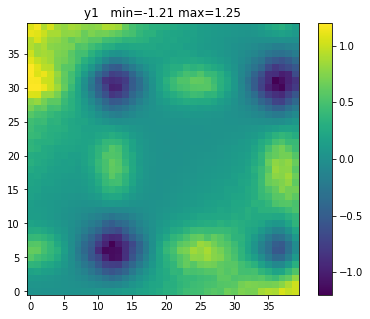

In [7]:
f = np.array(z)    
f = f.reshape(40,40)  
    
    
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
im = ax.imshow(f, clim=(-VAL_Max, VAL_Max),interpolation="nearest", origin="lower") # origin="upper"
nbOfVal = 40
title = "y1  "+" min="+str(round(np.amin(f),2))+ " max="+str(round(np.amax(f),2))
longTitle = title+" "+str(nbOfVal)+"by"+str(nbOfVal)
ax.set_title(title)
fig.colorbar(im, ax=ax)

np.savetxt(longTitle+'.out', f, delimiter=',')   # f is an array # use numpy.genfromtxt
print(longTitle+'.out')
print(f)
#print(np.matrix.sum(f))

fig.canvas.draw()
fig.canvas.flush_events()